In [1]:
import h5py
import matplotlib.pyplot as plt
import torch
import numpy as np
import cv2 as cv
import synth_text_dataset

%matplotlib inline

In [2]:
def apply_filters_to_image(img):
    img /= 255
    img = img.mean(axis=2)
    
    # Gaussian blur
    filter = cv.getGaussianKernel(5, 0.5)
    img = cv.filter2D(np.array(img, float), -1, filter)
    
    # Sharpening filter
    # filter = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    # img = cv.filter2D(np.array(img, float), -1, filter)
    
    # img = cv.Canny(np.array(img, np.uint8), 200, 250)
    
    # Edge detection
    # filter = np.full((7, 7), -1)
    # filter[len(filter) // 2, len(filter) // 2] = -filter.sum() - 1
    # img = cv.filter2D(np.array(img, float), -1, filter)
    
    # Median filter
    # img = cv.medianBlur(np.array(img, np.uint8), 5)
    
    # Blur filter
    # filter = np.ones((5, 5), np.float32)
    # filter /= filter.sum()
    # img = cv.filter2D(np.array(img, float), -1, filter)
    return img

def apply_filters_to_char(char_img):
    # Gaussian blur
    # filter = cv.getGaussianKernel(5, 0.5)
    # char_img = cv.filter2D(np.array(char_img, float), -1, filter)
    
    # Sharpening filter
    filter = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    char_img = cv.filter2D(np.array(char_img, float), -1, filter)
    
    # Edge detection
    # filter = np.full((7, 7), -1)
    # filter[len(filter) // 2, len(filter) // 2] = -filter.sum() - 1
    # char_img = cv.filter2D(np.array(char_img, float), -1, filter)
    
    # Median filter
    # char_img = torch.from_numpy(cv.medianBlur(np.array(char_img, np.uint8), 5)).int()
    
    # Blur filter
    # filter = np.ones((5, 5), np.float32)
    # filter /= filter.sum()
    # char_img = cv.filter2D(np.array(char_img, float), -1, filter)
    return char_img

In [9]:
mean = np.loadtxt('data/char_mean.txt')
std = np.loadtxt('data/char_std.txt')

def img_transform(x):
    x = x.astype(np.float32).mean(axis=2) / 255
    
    filter = cv.getGaussianKernel(5, 0.5)
    x = cv.filter2D(x, -1, filter)
    return x
 
def char_transform(x):
    x = x.astype(np.float32)
    
    filter = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    x = cv.filter2D(x, -1, filter)
    
    x = (x - mean) / std
    
    return x
 
# img_transform = trns.Compose([   
#     trns.Lambda(lambda x: x.mean(axis=2)),
#     trns.Lambda(lambda x: x / 255),
#     trns.Lambda(lambda x: torch.from_numpy(x)),
#     trns.ToTensor(),
#     trns.GaussianBlur(5),
#     trns.Lambda(lambda x: np.array(x)[0]),
# ])

# sharpening_filter = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
# char_transform = trns.Compose([
#     trns.ToTensor(),
#     trns.Lambda(lambda x: cv.filter2D(np.array(x, float), -1, sharpening_filter)),
#     trns.Lambda(lambda x: np.array(x)),
# ])

C:\Users\Hanich\AppData\Local\Temp\ipykernel_6620\4178056206.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(grid[:, 2])


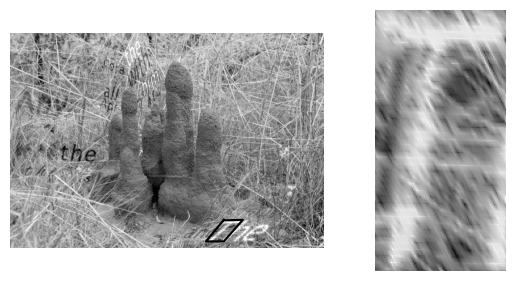

In [4]:
filename = 'Project/SynthText_train.h5'
dataset = synth_text_dataset.SynthTextCharactersDataset(filename, full_image_transform=img_transform, on_get_item_transform=char_transform)

data_samples = 1

for i in range(data_samples):
    grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
    
    plt.figure()
    (img_name, charBB), font = dataset.get_item_raw(i)
    char_img, font = dataset[i]
    plt.title(font)
    
    img = dataset.get_image_data(img_name)
    
    plt.subplot(grid[:, 2])
    plt.axis('off')
    plt.imshow(char_img, 'gray')
    
    
    plt.subplot(grid[:, :2])
    plt.axis('off')
    plt.imshow(img, cmap='gray')
    plt.plot(np.append(charBB[0], charBB[0, 0]), np.append(charBB[1], charBB[1, 1]), c='black')
    
    # plt.subplot(grid[:, 3])
    # plt.axis('off')
    # plt.imshow(char_img, cmap='gray')
    
    plt.show()
    

In [5]:
filename = 'Project/SynthText_train.h5'
import time
start = time.time()
dataset = synth_text_dataset.SynthTextCharactersDatasetRAM(filename, full_image_transform=img_transform, on_get_item_transform=char_transform)

x_items = dataset.x_items
y_items = dataset.y_items
print(f'Finished in {time.time() - start}')

print(x_items.shape)
print(y_items.shape)

Finished in 15.186294078826904
(30520, 200, 100)
(30520,)


mean.shape = (200, 100), std.shape = (200, 100)


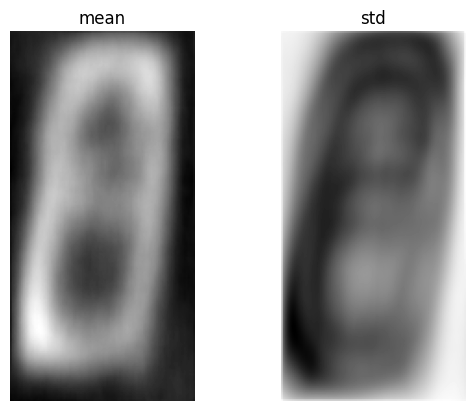

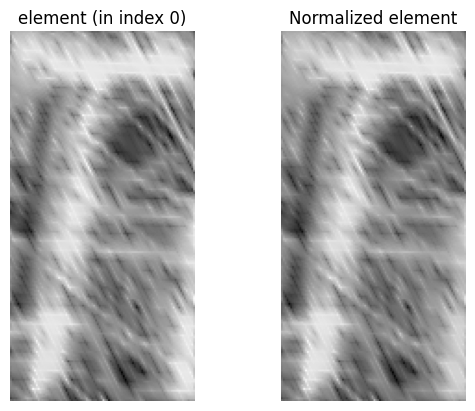

In [6]:
mean = x_items.mean(axis=0)
std = x_items.std(axis=0)

print(f'{mean.shape = }, {std.shape = }')

plt.figure()
plt.subplot(1,2,1)
plt.title('mean')
plt.axis('off')
plt.imshow(mean, cmap='gray')
plt.subplot(1,2,2)
plt.title('std')
plt.axis('off')
plt.imshow(std, cmap='gray')
plt.show()

idx = 0
plt.figure()
plt.subplot(1,2,1)
plt.title(f'element (in index {idx})')
plt.axis('off')
plt.imshow(x_items[idx], cmap='gray')
plt.subplot(1,2,2)
plt.title(f'Normalized element')
plt.axis('off')
plt.imshow((x_items[0] - mean) / std, cmap='gray')
plt.show()


In [10]:
filename = 'Project/SynthText_train.h5'
dataset = synth_text_dataset.SynthTextCharactersDatasetRAM(filename, full_image_transform=img_transform, on_get_item_transform=char_transform)



KeyboardInterrupt: 

In [2]:
import torch
from transforms import img_transform, char_transform, labels_transform
from synth_text_dataset import SynthTextCharactersDatasetRAM

device = (
        torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
    )
    
print('Loading data...')

filename = "Project/SynthText_train.h5"
num_of_images = 998
init_shape = (100, 100)
train_dataset = SynthTextCharactersDatasetRAM(
    filename,
    full_image_transform=img_transform,
    on_get_item_transform=char_transform,
    target_transform=labels_transform,
    end_idx=int(0.8 * num_of_images),
    shape=init_shape
)
test_dataset = SynthTextCharactersDatasetRAM(
    filename,
    full_image_transform=img_transform,
    on_get_item_transform=char_transform,
    target_transform=labels_transform,
    start_idx=int(0.8 * num_of_images),
    shape=init_shape
)
print('Data loaded successfully!')

Loading data...
